In [3]:
import statsmodels.api as sm
import pandas as pd
from plotnine import ggplot, aes, geom_jitter, geom_point, scale_size, scale_color_manual, labs, theme_minimal, scale_x_continuous, scale_y_continuous

## Working with Data of Global Indicators - Gapminder

"Gapminder identifies systematic misconceptions about important global trends and proportions and uses reliable data to develop easy to understand teaching materials to rid people of their misconceptions."


## Task 1

Below is a plot of a visualization in Gapminder (the default/starting one actually). Look it over and take note of the variables being visualized.


<img src = "gapminder_pic.png"
    width = "700"
    height = "350">

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

For the year 2010:

    - Income is the variable for the X axis.
    - Life expectancy is the variable for the Y axis.
    - A bubble chart is being used to visualize the data
    - Income is measured per person as GDP per capita (PPPS inflation-adjusted)
    - Color is based on world region
    - The chart is sectioned in to 4 income levels
    - The size of the bubble chart is depicted on the population of each region
    - Region is being mapped to fill/color aesthetic, with different colors representing different regions.

2. Import the q1data.csv dataset.

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


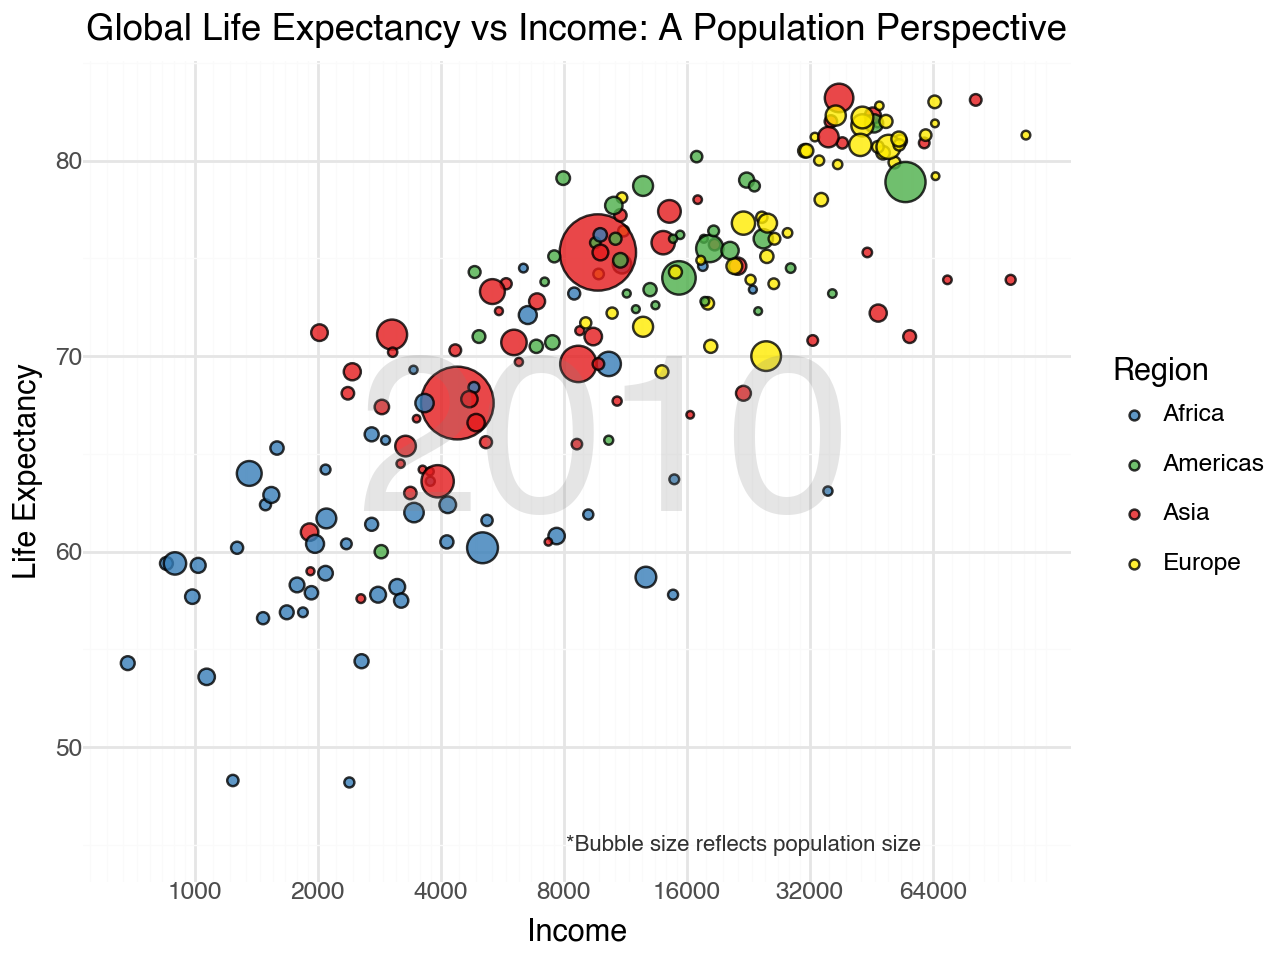

In [31]:
q1data = pd.read_csv('Data/q1data.csv')
q1data.head()

3. Recreate the plot as best you can using plotnine.

Sources: 
https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python.html

https://stackoverflow.com/questions/73632511/how-do-i-set-scaling-for-axes-using-plotnine

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


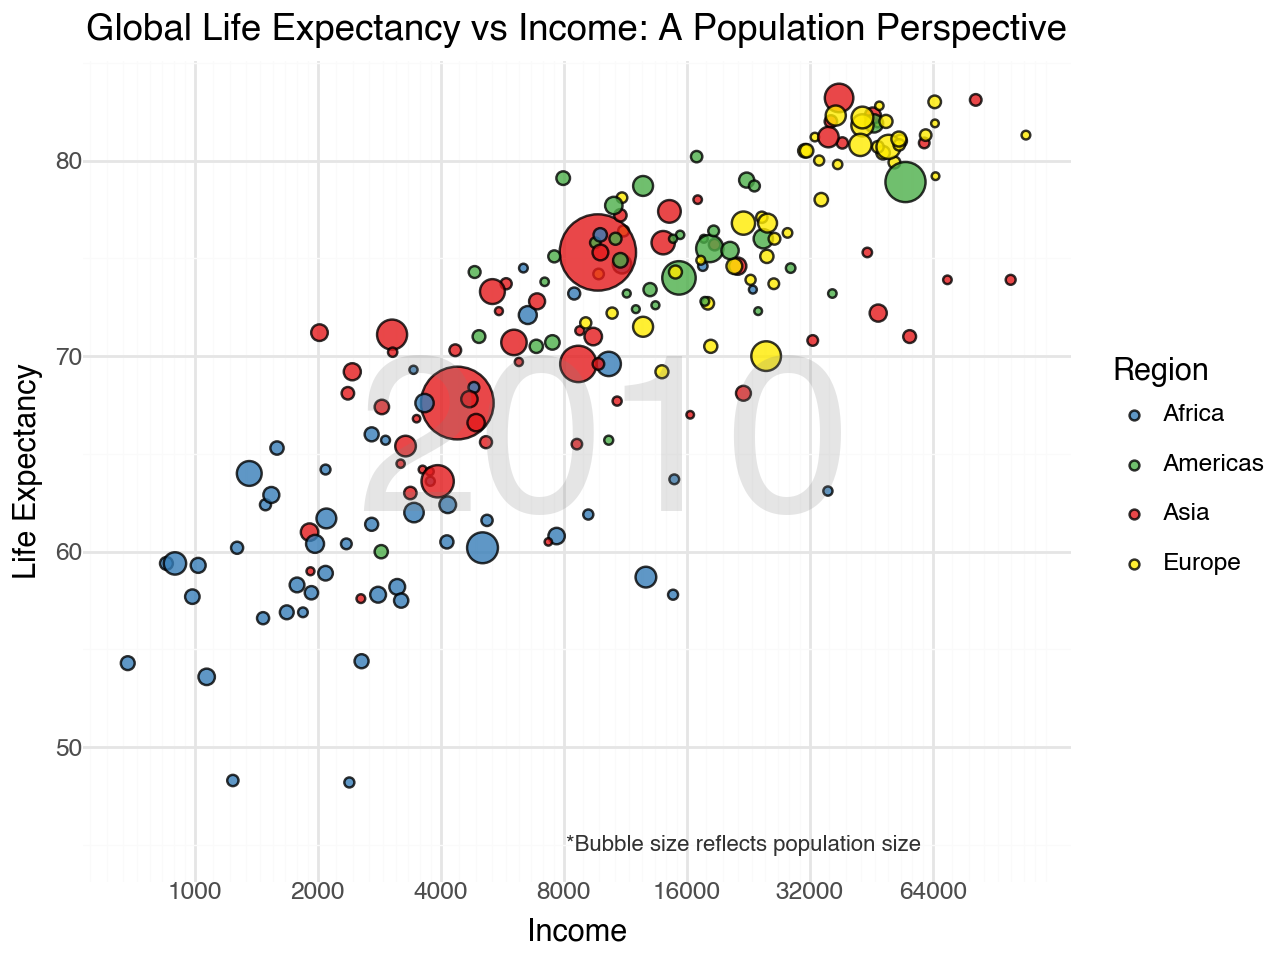

In [28]:
from plotnine import ggplot, aes, geom_point, scale_size_continuous, scale_x_log10, scale_fill_manual, labs, theme_minimal, annotate, guides, theme
import pandas as pd

region_colors = {
    'Africa': '#377eb8',    
    'Asia': '#e41a1c',      
    'Europe': '#ffeb00',    
    'Americas': '#4daf4a'   
}

q1data['four_regions'] = q1data['four_regions'].str.capitalize()

plot = (ggplot(q1data.dropna(), aes(x='income', y='life_exp', size='population', fill='four_regions'))
        + geom_point(alpha=0.8)
        + scale_size_continuous(range=[1, 15])  
        + theme_minimal()
        + labs(x='Income', y='Life Expectancy', 
               fill='Region',
               title="Global Life Expectancy vs Income: A Population Perspective")
        + guides(size=False)  
        + scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000])
        + annotate("text", x=10000, y=65, label="2010", 
                   size=80, color="grey", alpha=0.2, ha='center')
        + annotate("text", x=60000, y=45, label="*Bubble size reflects population size", 
                   size=8, color="black", alpha=0.8, ha='right')
        + scale_fill_manual(values=region_colors)  
        + theme(legend_position='right'))



4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

Besides using `geom_point`, another option would be to use `geom_jitter` and `geom_line` plots together. While a line plot (`geom_line`) alone can show trends or connections across data points, it lacks the ability to indicate population size. This is why it's beneficial to integrate `geom_jitter`—to help spread the data points and show population size through bubble size. Combining these geometries provides both a sense of relationships between variables (through the line plot) and an understanding of data density or importance (through the size of the jittered points).

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


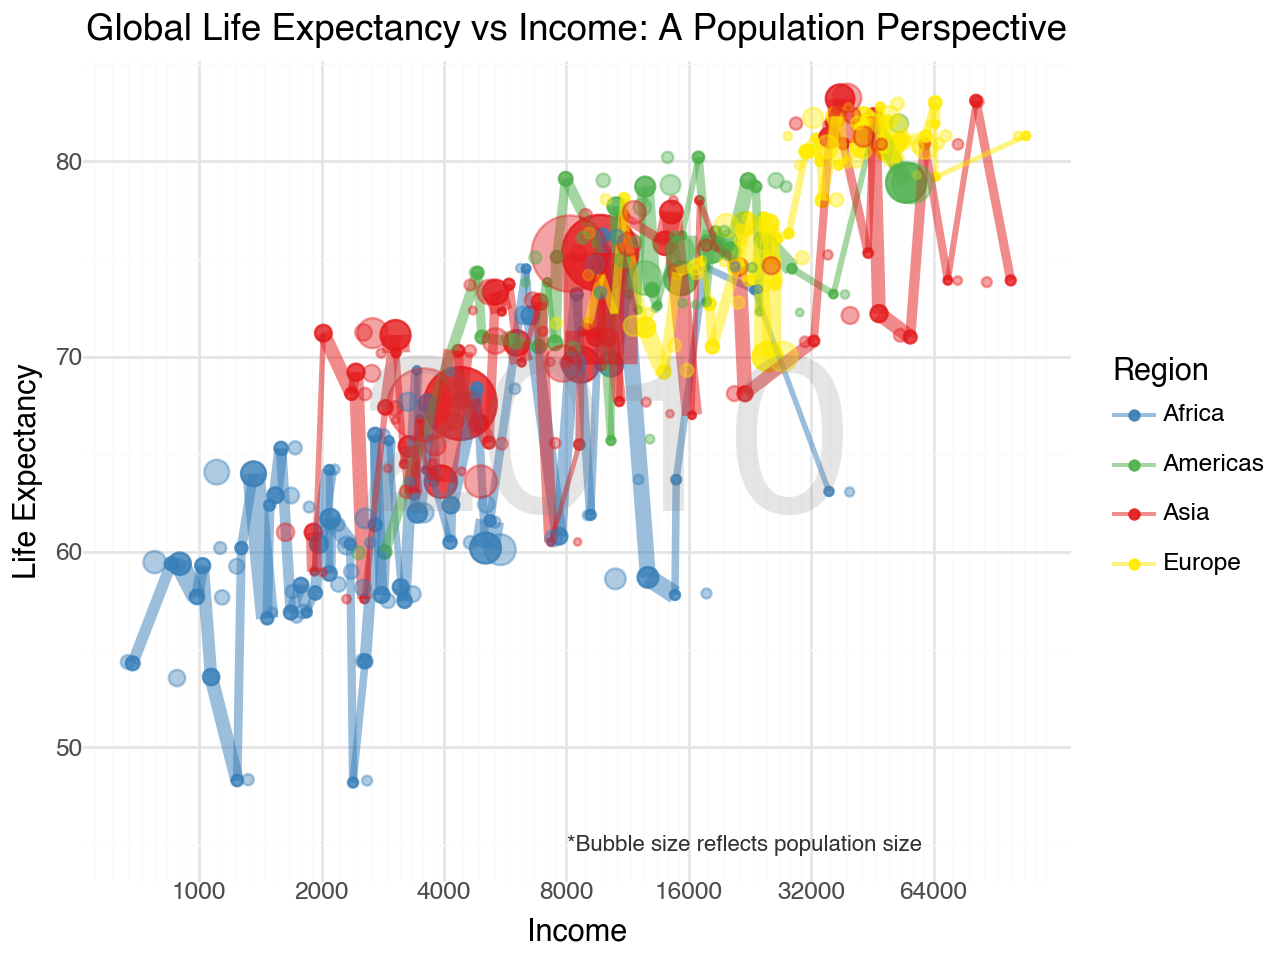

In [24]:
from plotnine import ggplot, aes, geom_point, geom_line, geom_jitter, scale_size_continuous, scale_x_log10, scale_fill_manual, scale_color_manual, labs, theme_minimal, annotate, guides, theme
import pandas as pd

region_colors = {
    'Africa': '#377eb8',    
    'Asia': '#e41a1c',     
    'Europe': '#ffeb00',   
    'Americas': '#4daf4a'   
}

q1data['four_regions'] = q1data['four_regions'].str.capitalize()

plot = (ggplot(q1data.dropna(), aes(x='income', y='life_exp', size='population', fill='four_regions', color='four_regions'))
        + geom_point(alpha=0.8)  # Main points (bubbles)
        + geom_line(aes(group='four_regions'), alpha=0.5)  
        + geom_jitter(width=0.1, height=0.1, alpha=0.4)  
        + scale_size_continuous(range=[1, 15])  
        + theme_minimal()
        + labs(x='Income', y='Life Expectancy', 
               fill='Region', color='Region',
               title="Global Life Expectancy vs Income: A Population Perspective")
        + guides(size=False)  # Remove the population (size) legend
        + scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000])
        + annotate("text", x=10000, y=65, label="2010", 
                   size=80, color="grey", alpha=0.2, ha='center')
        + annotate("text", x=60000, y=45, label="*Bubble size reflects population size", 
                   size=8, color="black", alpha=0.8, ha='right')
        + scale_fill_manual(values=region_colors)  
        + scale_color_manual(values=region_colors)  
        + theme(legend_position='right'))



## Task 2

Below is another plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.




<img src = "1997.png"
    width = "700"
    height = "350">

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

For the year 1997:

    - The X axis is Exports measured in % of GDP
    - The Y axis is Imports measured in % of GDP
    - The Bubble Size is represented by energy use
    - The Year (1997) is shown in large and faded text in the background to indicate the year of the data being visualized
    - The color represents the different world regions as indicated by the color-coded map legend, using the fill/color aesthetic



2. Import the q2data.csv dataset.
Tidy data before importing dataset because k is a non-numerical indicator and converting it to a numerical indicator.

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
6,12.9,10.4,1660,1997,Argentina,americas,america,america_south,Latin America & Caribbean
7,52.8,19.0,610,1997,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia
9,20.5,19.6,5550,1997,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


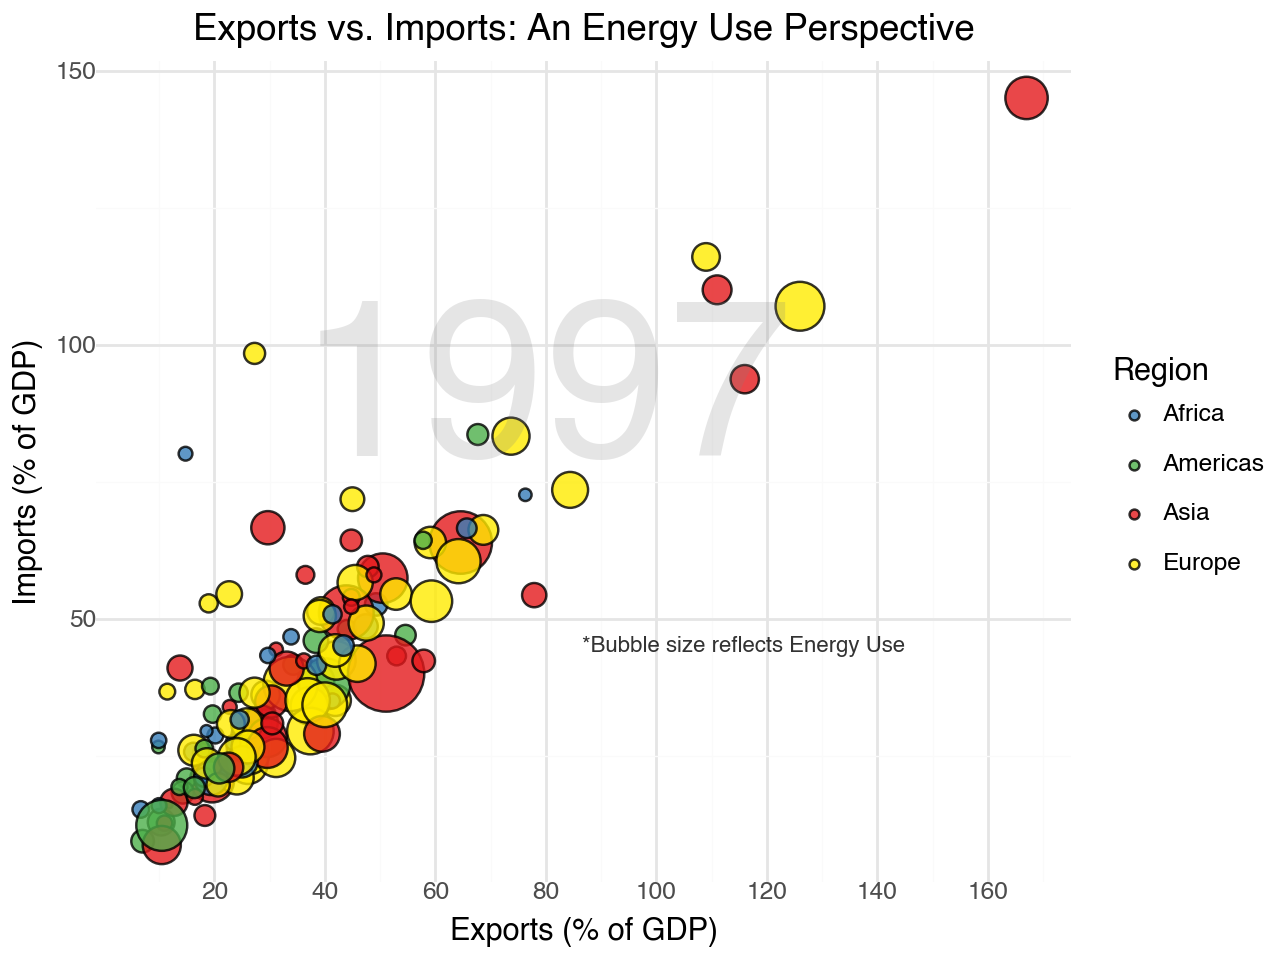

In [44]:
q2data = pd.read_csv('Data/q2data.csv')
q2data = q2data.dropna()

def convert_k_to_numeric(value):
    if isinstance(value, str) and 'k' in value:
        return float(value.replace('k', '')) * 1000
    return value 

q2data['energy'] = q2data['energy'].apply(convert_k_to_numeric).astype(int)

q2data.head()

3. Recreate the plot as best you can using plotnine.

Sources:
https://plotnine.org/reference/guide.html

https://ggplot2.tidyverse.org/reference/ggtheme.html

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


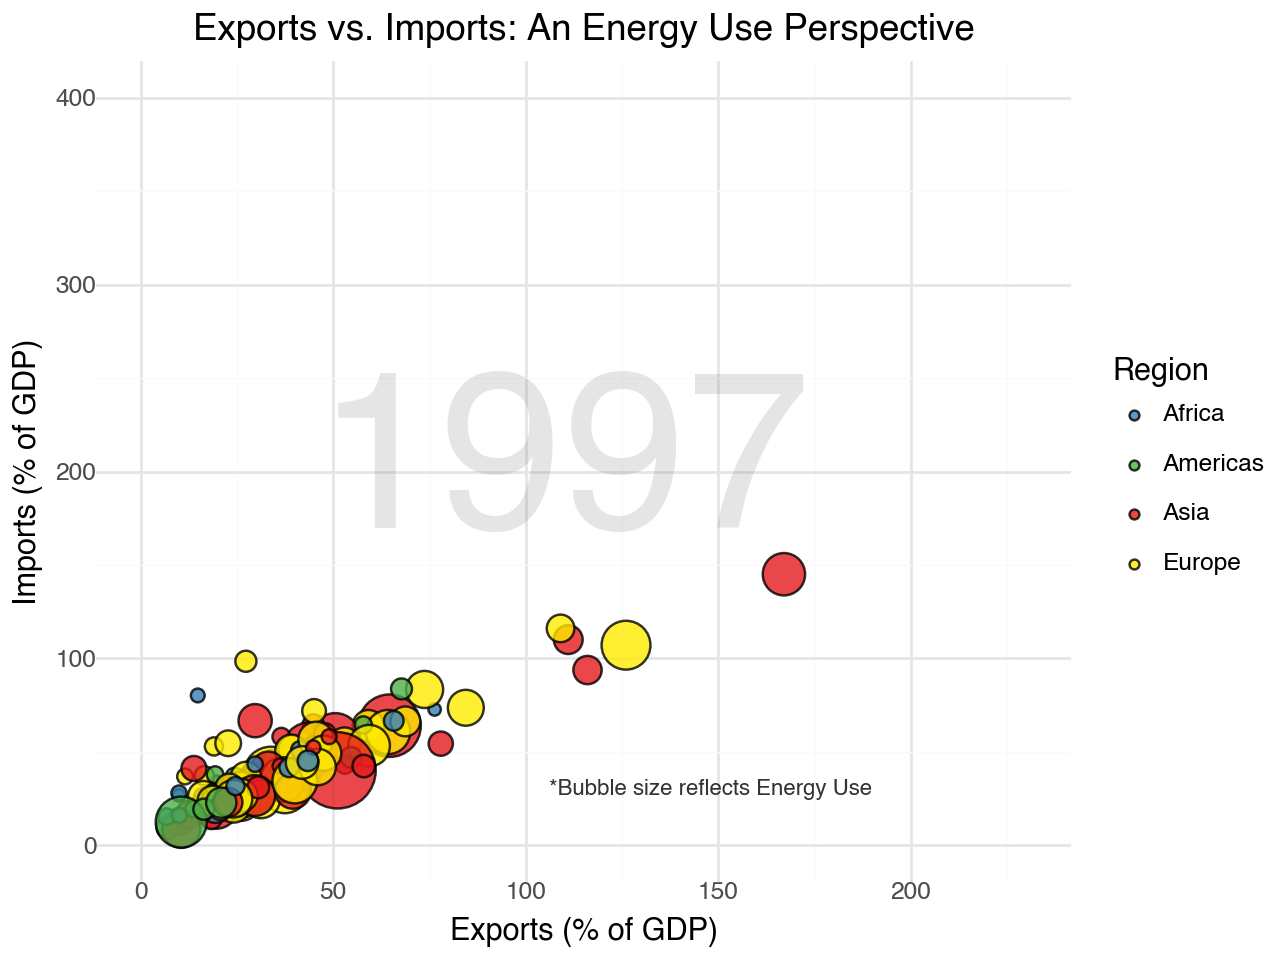

In [51]:
from plotnine import ggplot, aes, geom_point, scale_size_continuous, scale_x_continuous, scale_y_continuous, scale_fill_manual, labs, theme_minimal, annotate, guides, theme
import pandas as pd

region_colors = {
    'Africa': '#377eb8',    
    'Asia': '#e41a1c',      
    'Europe': '#ffeb00',    
    'Americas': '#4daf4a'   
}

q2data['four_regions'] = q2data['four_regions'].str.capitalize()

plot = (ggplot(q2data.dropna(), aes(x='exports', y='imports', size='energy', fill='four_regions'))
        + geom_point(alpha=0.8)
        + scale_size_continuous(range=[1, 15])  
        + theme_minimal()
        + labs(x='Exports (% of GDP)', y='Imports (% of GDP)', 
               fill='Region',
               title="Exports vs. Imports: An Energy Use Perspective")
        + guides(size=False)  
        + scale_y_continuous(limits=[0, 400]) 
        + scale_x_continuous(limits=[0, 230])  
        + annotate("text", x=110, y=200, label="1997",  
                   size=80, color="grey", alpha=0.2, ha='center')
        + annotate("text", x=190, y=30, label="*Bubble size reflects Energy Use", 
                   size=8, color="black", alpha=0.8, ha='right')
        + scale_fill_manual(values=region_colors)  
        + theme(legend_position='right'))


4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

Using `geom_density_2d` in this plot provides valuable insights into the distribution and density of the data points. The contour lines created by `geom_density_2d` effectively highlight areas where data points are most densely concentrated, helping to visualize clusters that may be difficult to identify with just `geom_point`. This is particularly useful for reducing overplotting, as many overlapping points can obscure the underlying data patterns. By showing density through contour lines, `geom_density_2d` makes it easier to interpret areas with higher occurrences without cluttering the graph. Additionally, the contour lines help in identifying general trends by grouping similar data points, offering a clearer understanding of how exports and imports vary across regions in relation to energy use. Overall, `geom_density_2d` is a valuable tool for visualizing patterns, reducing overplotting, and enhancing the interpretability of scatterplots.


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


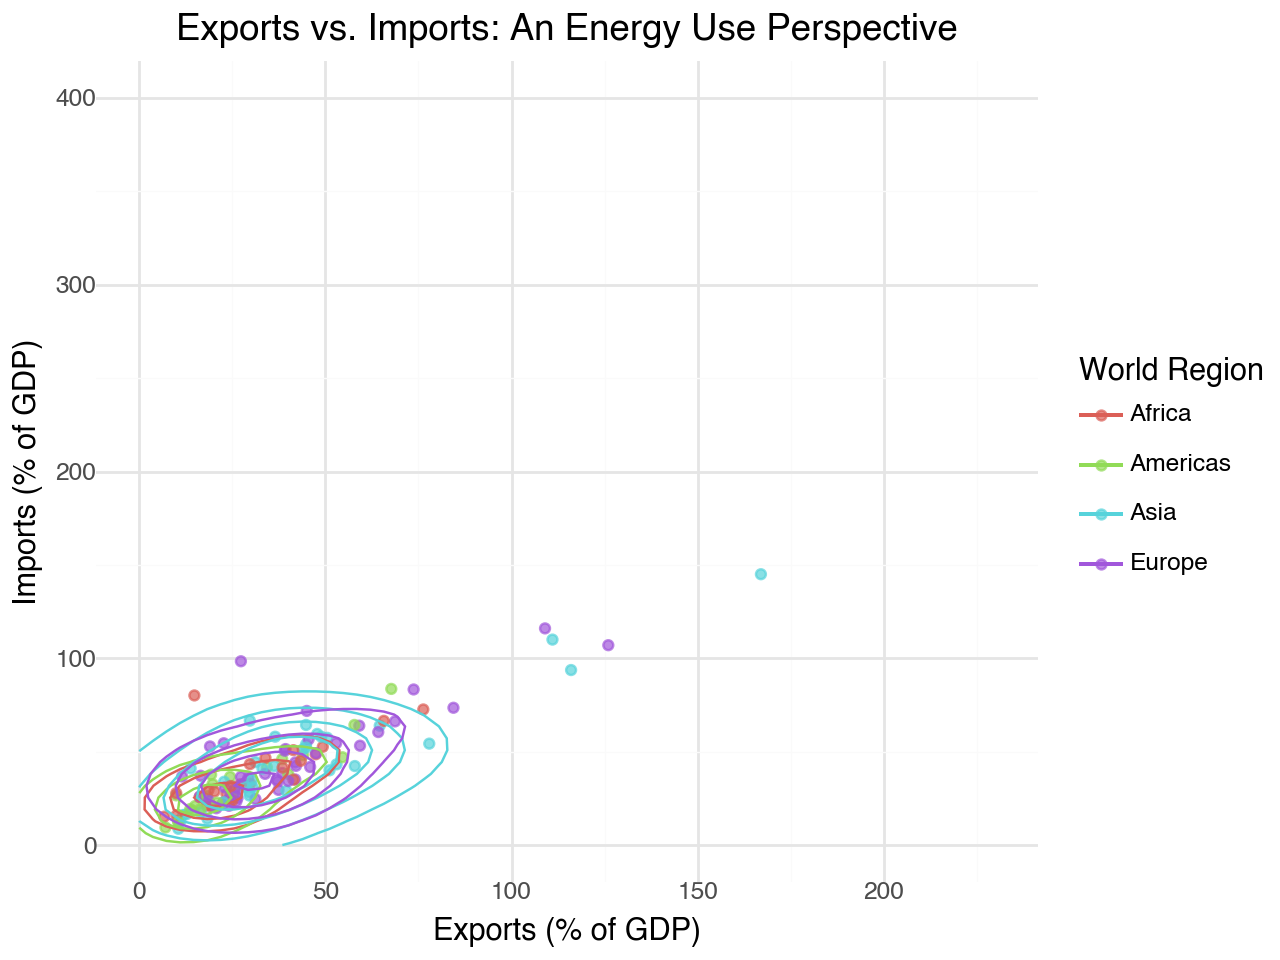

In [60]:
from plotnine import ggplot, aes, geom_point, geom_density_2d, labs, theme_minimal, scale_x_continuous, scale_y_continuous

plot = (
    ggplot(q2data, aes(x='exports', y='imports', color='four_regions')) +
    geom_point(alpha=0.7) +
    geom_density_2d() +  
    labs(
        x='Exports (% of GDP)',
        y='Imports (% of GDP)',
        color='World Region',
        title='Exports vs. Imports: An Energy Use Perspective'
    ) +
    scale_x_continuous(limits=[0, 230]) +  
    scale_y_continuous(limits=[0, 400]) +  
    theme_minimal()
)




## Task 3

Below is a final plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.




<img src = "2001.png"
    width = "750"
    height = "250">

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

For the year 1997:

    - The X axis is Indivuals using the Internet 
    - The Y axis is GDP per capita
    - The Bubble Size is represented by income 
    - The Year (2001) is shown in large and faded text in the background to indicate the year of the data being visualized
    - The color represents the different world regions as indicated by the color-coded map legend, using the fill/color aesthetic


2. Import the q3data.csv dataset. 

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


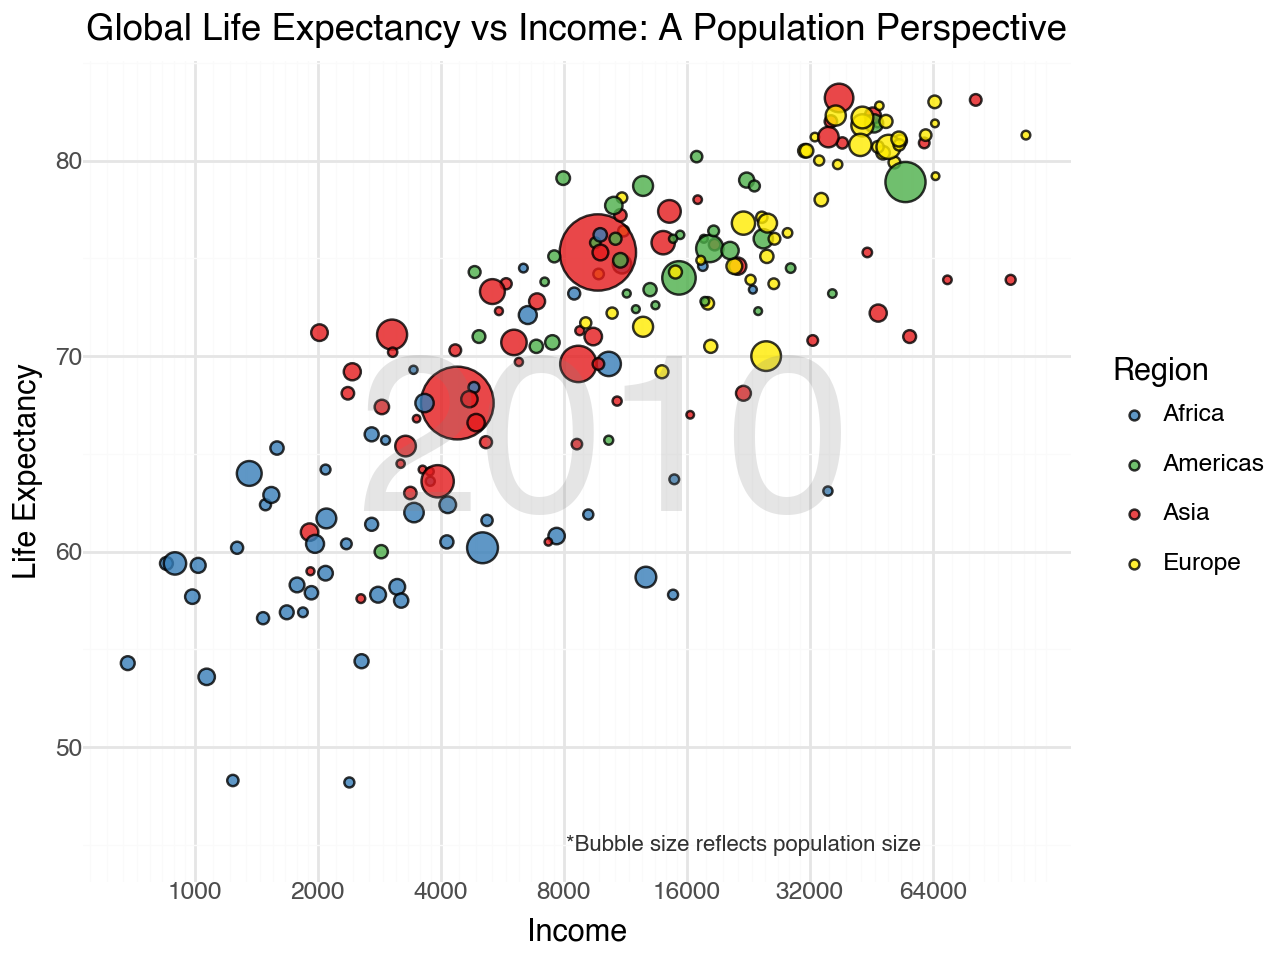

In [32]:
q3data = pd.read_csv('Data/q3data.csv')
q3data.head()

3. Recreate the plot as best you can using plotnine.

Sources:

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


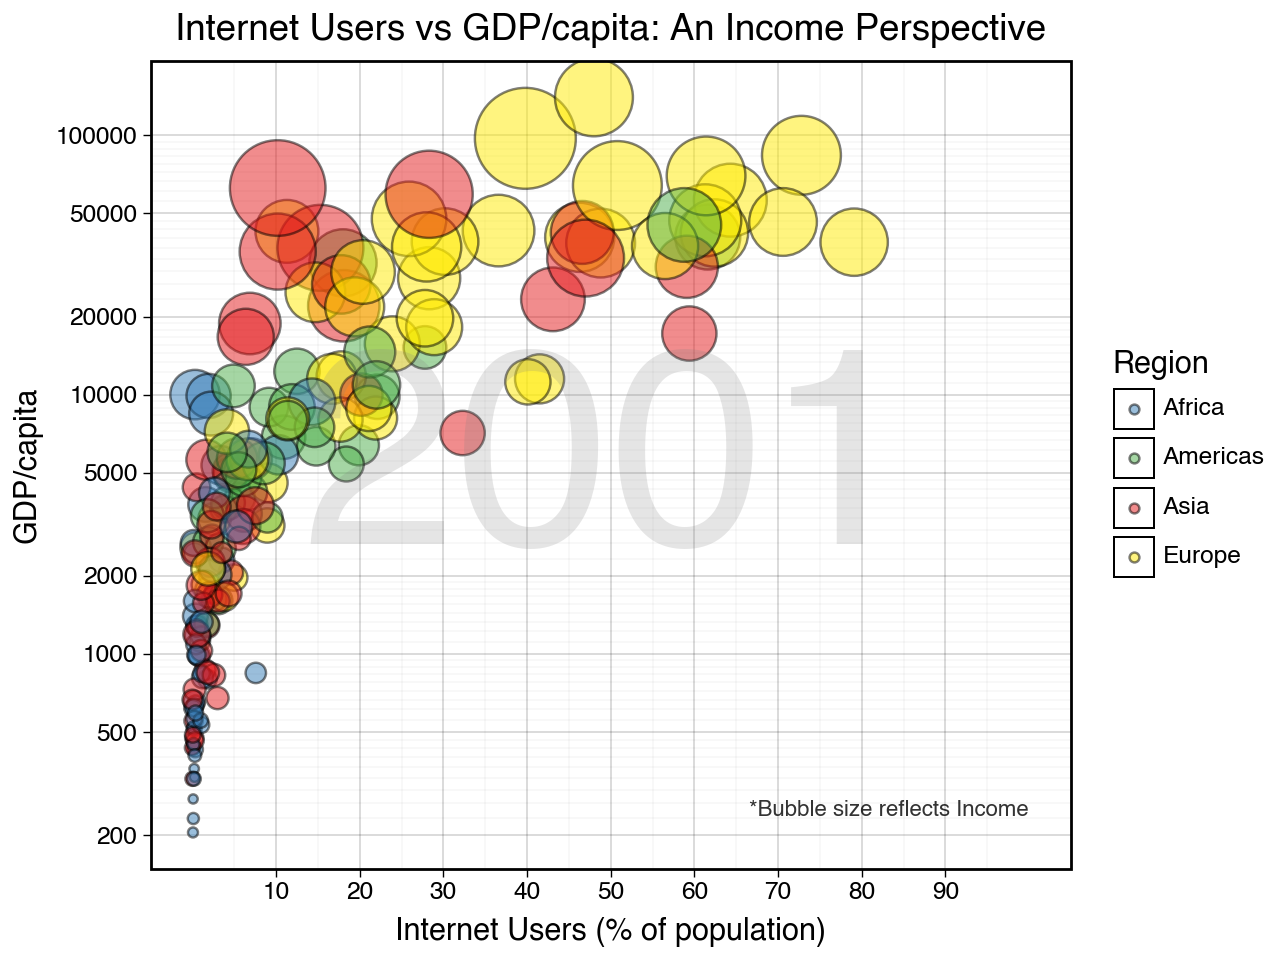

In [77]:
from plotnine import ggplot, aes, geom_point, theme_linedraw, scale_y_log10, scale_size_continuous, scale_x_continuous, scale_fill_manual, labs, annotate, guides, theme
import pandas as pd

region_colors = {
    'Africa': '#377eb8',    
    'Asia': '#e41a1c',      
    'Europe': '#ffeb00',    
    'Americas': '#4daf4a' 
}

q3data_filtered = q3data.dropna(subset=['four_regions'])

plot = (ggplot(q3data_filtered, aes(x='internet_users', y='gdp', size='income', fill='four_regions'))
    + geom_point(alpha=0.5)
    + scale_size_continuous(range=[1, 20])  
    + theme_linedraw() 
    + labs(x='Internet Users (% of population)', y='GDP/capita', 
           fill='Region', title="Internet Users vs GDP/capita: An Income Perspective")
    + scale_y_log10(breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000])  
    + scale_x_continuous(breaks=[10,20,30,40,50,60,70,80,90])  
    + annotate("text", x=50, y=5000, label="2001", size=100, color="grey", alpha=0.2, ha='center')  
    + annotate("text", x=100, y=250, label="*Bubble size reflects Income", size=8, color="black", alpha=0.8, ha='right')  
    + scale_fill_manual(values=region_colors)  
    + guides(size=False)  
    + theme(legend_position='right'))


4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

Using `geom_smooth` in this plot is effective because it provides a clear representation of the overall trend between internet users and GDP per capita. Specifically, the regression line helps summarize the relationship between these variables for different world regions. The positive correlation between internet usage and GDP per capita is visually apparent through the trend lines, which are color-coded by region, making it easy to identify and compare patterns across different areas of the world. Additionally, the confidence intervals, shown as shaded regions around the trend lines, give a sense of uncertainty in the estimates, which enhances the interpretation of how internet usage may predict GDP per capita for each region.

This geometry is particularly useful for highlighting overall trends in a simplified manner. It helps avoid the clutter that individual data points might create, especially in large datasets, and instead focuses on the broader patterns. By allowing for a region-based comparison, `geom_smooth` also helps in understanding how the impact of internet usage on GDP varies globally.

However, a limitation of this approach is that it may obscure individual variations and outliers within each region. Important data points that fall outside of the general trend might not be easily visible, which can sometimes lead to missing key details that could influence the analysis. While `geom_smooth` is effective for visualizing trends, it might not fully capture the complexity of the dataset in cases where outliers or detailed data points are significant.

Sources: 
https://ggplot2.tidyverse.org/reference/geom_smooth.html

https://stackoverflow.com/questions/16562859/ggplot2-colour-geom-point-by-factor-but-geom-smooth-based-on-all-data

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


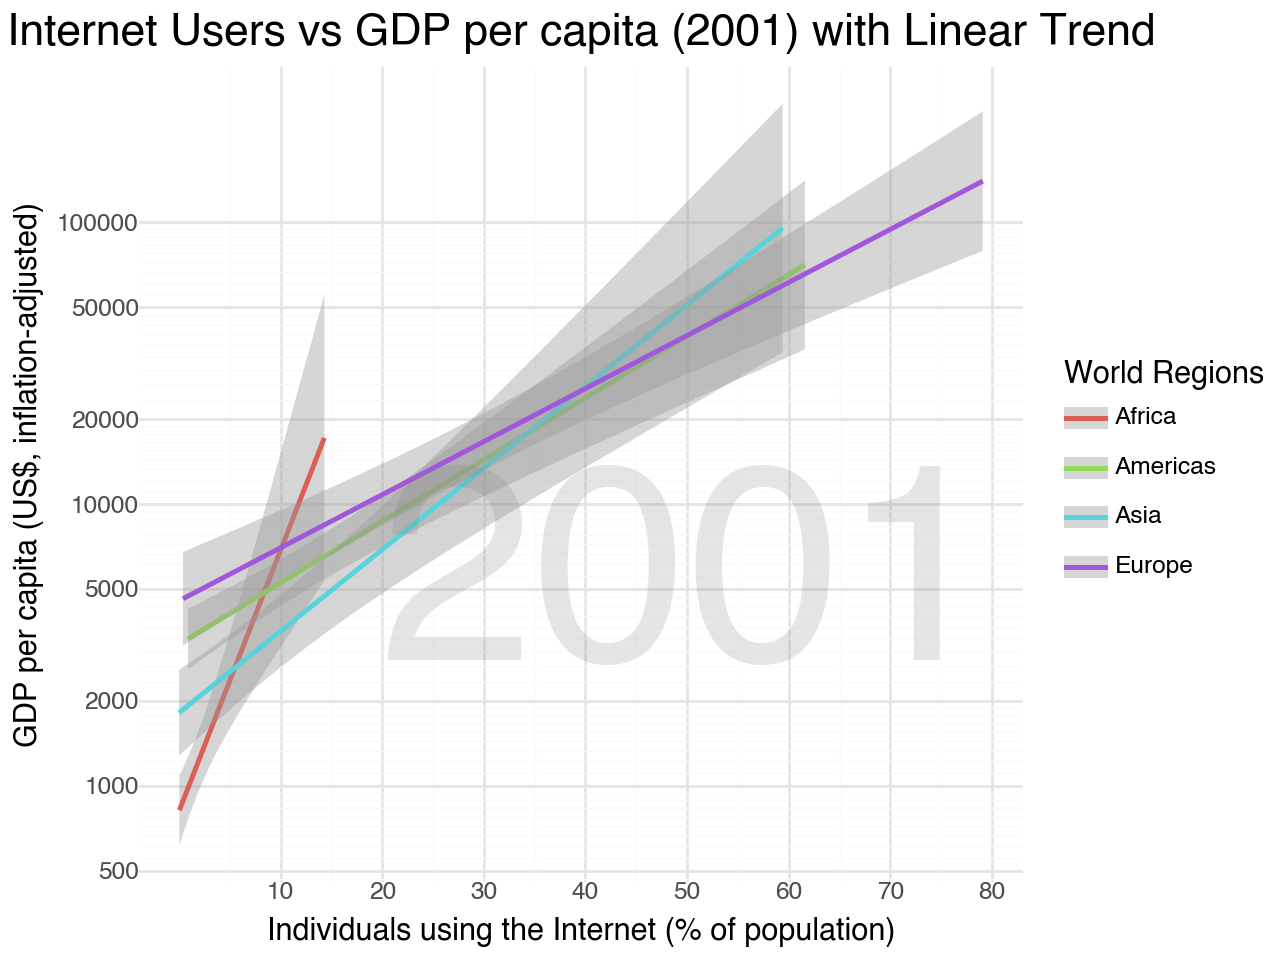

In [83]:
from plotnine import ggplot, aes, geom_smooth, scale_x_continuous, scale_y_log10, labs, theme_minimal, annotate, theme, element_text

# Create the plot using geom_smooth with linear regression method
plot = (ggplot(q3data_filtered, aes(x='internet_users', y='gdp', color='four_regions'))
        + geom_smooth(method='lm')  # Using linear regression for the trend line
        + scale_x_continuous(breaks=[10,20,30,40,50,60,70,80,90], name="Individuals using the Internet (% of population)")
        + scale_y_log10(breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], name="GDP per capita (US$, inflation-adjusted)")
        + labs(title="Internet Users vs GDP per capita (2001) with Linear Trend", color="World Regions")
        + annotate("text", x=50, y=5000, label="2001", size=100, color="grey", alpha=0.2, ha='center')  # Year annotation in the middle
        + theme_minimal()
        + theme(
            legend_position='right',
            plot_title=element_text(ha='center', va='top', size=16)  # Center the title
        )
       )


